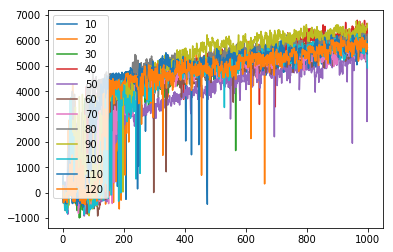

In [8]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

log_file0 = './logs/HalfCheetah-v1/10epoch/gym_eval.monitor.csv'
log_file1 = './logs/HalfCheetah-v1/20epoch/gym_eval.monitor.csv'
log_file2 = './logs/HalfCheetah-v1/30epoch/gym_eval.monitor.csv'
#log_file3 = './logs/HalfCheetah-v1/newer_expert_data_with_only_expert_actor_loss/gym_eval.monitor.csv'
log_file3 = './logs/HalfCheetah-v1/40epoch/gym_eval.monitor.csv'
log_file4 = './logs/HalfCheetah-v1/50epoch/gym_eval.monitor.csv'
log_file5 = './logs/HalfCheetah-v1/60epoch/gym_eval.monitor.csv'
log_file6 = './logs/HalfCheetah-v1/70epoch/gym_eval.monitor.csv'
log_file7 = './logs/HalfCheetah-v1/80epoch/gym_eval.monitor.csv'
log_file8 = './logs/HalfCheetah-v1/90epoch/gym_eval.monitor.csv'
log_file9 = './logs/HalfCheetah-v1/100epoch/gym_eval.monitor.csv'
log_file10 = './logs/HalfCheetah-v1/110epoch/gym_eval.monitor.csv'
log_file11 = './logs/HalfCheetah-v1/120epoch/gym_eval.monitor.csv'

data0 = pandas.read_csv(log_file0, index_col=None, comment='#')
data0 = data0['r']
data1 = pandas.read_csv(log_file1, index_col=None, comment='#')
data1 = data1['r']
data2 = pandas.read_csv(log_file2, index_col=None, comment='#')
data2 = data2['r']
data3 = pandas.read_csv(log_file3, index_col=None, comment='#')
data3 = data3['r']
data4 = pandas.read_csv(log_file4, index_col=None, comment='#')
data4 = data4['r']
data5 = pandas.read_csv(log_file5, index_col=None, comment='#')
data5 = data5['r']
data6 = pandas.read_csv(log_file6, index_col=None, comment='#')
data6 = data6['r']
data7 = pandas.read_csv(log_file7, index_col=None, comment='#')
data7 = data7['r']
data8 = pandas.read_csv(log_file8, index_col=None, comment='#')
data8 = data8['r']
data9 = pandas.read_csv(log_file9, index_col=None, comment='#')
data9 = data9['r']
data10 = pandas.read_csv(log_file10, index_col=None, comment='#')
data10 = data10['r']
data11 = pandas.read_csv(log_file11, index_col=None, comment='#')
data11 = data11['r']

plt.plot(data0)
plt.plot(data1)
plt.plot(data2)
plt.plot(data3)
plt.plot(data4)
plt.plot(data5)
plt.plot(data6)
plt.plot(data7)
plt.plot(data8)
plt.plot(data9)
plt.plot(data10)
plt.plot(data11)
#plt.legend(['baseline', 'both expert and ddpg', 'only ddpg', 'new loss'])#, 'only expert'])
plt.legend(['10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110', '120'])
plt.show()


#log_file0 = './logs/HalfCheetah-v1/2018-03-16-17-27-35-095198/progress.csv'

#data0 = pandas.read_csv(log_file0, index_col=None, comment='#')
#print(data0)
#lc = data0['train/dist'].values
#la = data0['train/loss_actor'].values
#print(lc)
#plt.plot(lc)
#plt.plot(la)
#plt.legend(['critic', 'actor'])#, 'only expert'])
#plt.grid()
#plt.show()

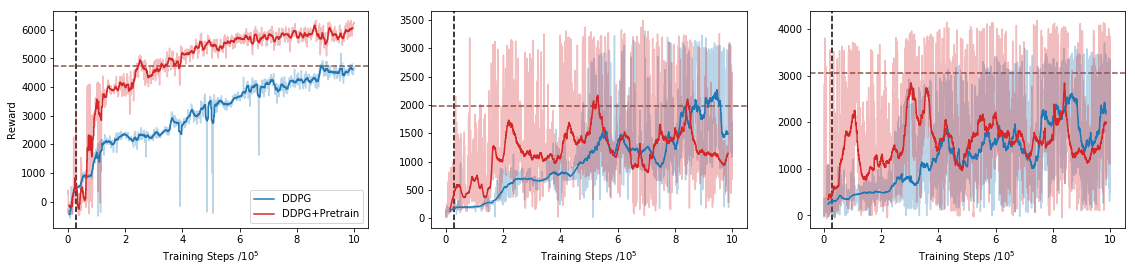

In [11]:
import os
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

def smooth(n,x,y):
    sm = np.zeros(10000)
    k=0
    f = lambda x,l,h: x <= h and x >= l
    sm_x = np.arange(1, np.max(x)-n+1, 100)
    for i in sm_x:
        idx = [f(var,i,i+n) for var in x]
        sm[k] = np.dot(idx,y)/np.sum(idx)
        k=k+1
    sm = sm[:k]
    sm_x = sm_x[:k] + np.floor(n/2)
    return sm, sm_x



env_ids = ['HalfCheetah-v1', 'Hopper-v1', 'Walker2d-v1']#, 'HumanoidStandup-v1']
ave_rewards = [4721.3959546, 1982.82768185, 3062.83132533]

expertfiles = [os.path.join('./logs', var, 'expert/gym_eval.monitor.csv') for var in env_ids]
baselinefiles = [os.path.join('./logs', var, 'baseline/gym_eval.monitor.csv') for var in env_ids]

expertdata = [pandas.read_csv(file, index_col=None, comment='#') for file in expertfiles]
baselinedata = [pandas.read_csv(file, index_col=None, comment='#') for file in baselinefiles]

x_expert = [np.cumsum(var['l'].values) for var in expertdata]
x_baseline = [np.cumsum(var['l'].values) for var in baselinedata]

r_expert = [var['r'] for var in expertdata]
r_baseline = [var['r'] for var in baselinedata]


r_baseline_smooth = [var['r'] for var in baselinedata]
'''
for i in range(len(x_expert)):
    if i==0:
        sm_n = 10000
    else:
        sm_n = 30000
    r_expert_smooth, x_expert_smooth = smooth(sm_n, x_expert[i], r_expert[i])
    r_baseline_smooth, x_baseline_smooth = smooth(sm_n, x_baseline[i], r_baseline[i])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x_baseline[i]/1e5*2, r_baseline[i], 'C0', alpha=0.3, label='')
    ax.plot(x_expert[i]/1e5*2, r_expert[i], 'C3', alpha=0.3, label='')
    ax.plot(x_baseline_smooth/1e5*2, r_baseline_smooth, 'C0', label='DDPG')
    ax.plot(x_expert_smooth/1e5*2, r_expert_smooth, 'C3', label='DDPG+Pretrain')
    ax.vlines(0.6, 0, 1, transform=ax.get_xaxis_transform(), colors='k', linestyles = "dashed", label='')
    ax.hlines(ave_rewards[i], 0, 1, transform=ax.get_yaxis_transform(), colors='C5', linestyles = "dashed", label='')
    plt.xlabel('Simulation Steps /$10^5$')
    plt.ylabel('Reward')
    
    #plt.xticks([30000],['End of Pretrain'])
    
    plt.legend()
    plt.show()
'''
pdf = PdfPages('./DDPG_results.pdf')
fig = plt.figure(figsize=(6.4*3,4.0))

sm_n = 10000
r_expert_smooth, x_expert_smooth = smooth(sm_n, x_expert[0], r_expert[0])
r_baseline_smooth, x_baseline_smooth = smooth(sm_n, x_baseline[0], r_baseline[0])
ax = fig.add_subplot(131)
ax.plot(x_baseline[0]/1e5, r_baseline[0], 'C0', alpha=0.3, label='')
ax.plot(x_expert[0]/1e5, r_expert[0], 'C3', alpha=0.3, label='')
ax.plot(x_baseline_smooth/1e5, r_baseline_smooth, 'C0', label='DDPG')
ax.plot(x_expert_smooth/1e5, r_expert_smooth, 'C3', label='DDPG+Pretrain')
ax.vlines(0.3, 0, 1, transform=ax.get_xaxis_transform(), colors='k', linestyles = "dashed", label='')
ax.hlines(ave_rewards[0], 0, 1, transform=ax.get_yaxis_transform(), colors='C5', linestyles = "dashed", label='')
plt.xlabel('Training Steps /$10^5$')
plt.ylabel('Reward')
plt.legend()

##################################################
sm_n = 30000
r_expert_smooth, x_expert_smooth = smooth(sm_n, x_expert[1], r_expert[1])
r_baseline_smooth, x_baseline_smooth = smooth(sm_n, x_baseline[1], r_baseline[1])
ax = fig.add_subplot(132)
ax.plot(x_baseline[1]/1e5, r_baseline[1], 'C0', alpha=0.3, label='')
ax.plot(x_expert[1]/1e5, r_expert[1], 'C3', alpha=0.3, label='')
ax.plot(x_baseline_smooth/1e5, r_baseline_smooth, 'C0', label='DDPG')
ax.plot(x_expert_smooth/1e5, r_expert_smooth, 'C3', label='DDPG+Pretrain')
ax.vlines(0.3, 0, 1, transform=ax.get_xaxis_transform(), colors='k', linestyles = "dashed", label='End of Pretrain')
ax.hlines(ave_rewards[1], 0, 1, transform=ax.get_yaxis_transform(), colors='C5', linestyles = "dashed", label='Average Reward of ED')
plt.xlabel('Training Steps /$10^5$')

#####################################################
r_expert_smooth, x_expert_smooth = smooth(sm_n, x_expert[2], r_expert[2])
r_baseline_smooth, x_baseline_smooth = smooth(sm_n, x_baseline[2], r_baseline[2])
ax = fig.add_subplot(133)
ax.plot(x_baseline[2]/1e5, r_baseline[2], 'C0', alpha=0.3, label='')
ax.plot(x_expert[2]/1e5, r_expert[2], 'C3', alpha=0.3, label='')
ax.plot(x_baseline_smooth/1e5, r_baseline_smooth, 'C0', label='DDPG')
ax.plot(x_expert_smooth/1e5, r_expert_smooth, 'C3', label='DDPG+Pretrain')
ax.vlines(0.3, 0, 1, transform=ax.get_xaxis_transform(), colors='k', linestyles = "dashed", label='End of Pretrain')
ax.hlines(ave_rewards[2], 0, 1, transform=ax.get_yaxis_transform(), colors='C5', linestyles = "dashed", label='Average Reward of ED')


plt.xlabel('Training Steps /$10^5$')


#plt.xticks([30000],['End of Pretrain'])

plt.show()
pdf.savefig(fig)
plt.close()
pdf.close()

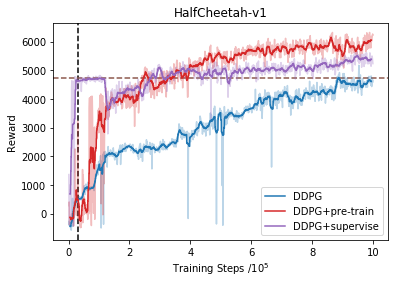

In [15]:
import os
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

def smooth(n,x,y):
    sm = np.zeros(10000)
    k=0
    f = lambda x,l,h: x <= h and x >= l
    sm_x = np.arange(1, np.max(x)-n+1, 100)
    for i in sm_x:
        idx = [f(var,i,i+n) for var in x]
        sm[k] = np.dot(idx,y)/np.sum(idx)
        k=k+1
    sm = sm[:k]
    sm_x = sm_x[:k] + np.floor(n/2)
    return sm, sm_x



env_ids = 'HalfCheetah-v1'#, 'Hopper-v1', 'Walker2d-v1']#, 'HumanoidStandup-v1']
ave_rewards = 4721.3959546#, 1982.82768185, 3062.83132533]

expertfiles = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'expert/gym_eval.monitor.csv')
baselinefiles = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'baseline/gym_eval.monitor.csv')
supervisedfiles = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs',env_ids, 'supervise/gym_eval.monitor.csv')

superviseddata = pandas.read_csv(supervisedfiles, index_col=None, comment='#')
expertdata = pandas.read_csv(expertfiles, index_col=None, comment='#')
baselinedata = pandas.read_csv(baselinefiles, index_col=None, comment='#')

x_supervised = np.cumsum(superviseddata['l'].values)
x_expert = np.cumsum(expertdata['l'].values)
x_baseline = np.cumsum(baselinedata['l'].values)

r_supervised = superviseddata['r']
r_expert = expertdata['r']
r_baseline = baselinedata['r']

#r_baseline_smooth = baselinedata['r']

pdf = PdfPages('./test.pdf')
fig = plt.figure()#figsize=(6.4*3,4.0))

sm_n = 10000
r_expert_smooth, x_expert_smooth = smooth(sm_n, x_expert, r_expert)
r_baseline_smooth, x_baseline_smooth = smooth(sm_n, x_baseline, r_baseline)
r_supervised_smooth, x_supervised_smooth = smooth(sm_n, x_supervised, r_supervised)

ax = fig.add_subplot(111)
ax.plot(x_baseline/1e5, r_baseline, 'C0', alpha=0.3, label='')
ax.plot(x_expert/1e5, r_expert, 'C3', alpha=0.3, label='')
ax.plot(x_supervised/1e5, r_supervised, 'C4', alpha=0.3, label='')

ax.plot(x_baseline_smooth/1e5, r_baseline_smooth, 'C0', label='DDPG')
ax.plot(x_expert_smooth/1e5, r_expert_smooth, 'C3', label='DDPG+pre-train')
ax.plot(x_supervised_smooth/1e5, r_supervised_smooth, 'C4', label='DDPG+supervise')
ax.set_title(env_ids)
ax.vlines(0.3, 0, 1, transform=ax.get_xaxis_transform(), colors='k', linestyles = "dashed", label='')
ax.hlines(ave_rewards, 0, 1, transform=ax.get_yaxis_transform(), colors='C5', linestyles = "dashed", label='')
plt.xlabel('Training Steps /$10^5$')
plt.ylabel('Reward')
plt.legend()

plt.show()
pdf.savefig(fig)
plt.close()
pdf.close()

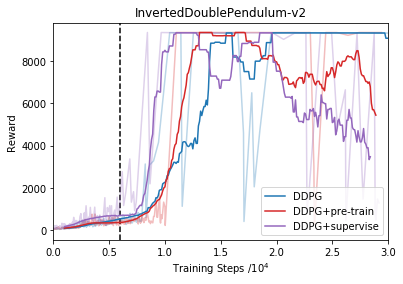

In [148]:
import os
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

def smooth(n,x,y):
    sm = np.zeros(10000)
    k=0
    f = lambda x,l,h: x <= h and x >= l
    sm_x = np.arange(1, np.max(x)-n+1, 100)
    for i in sm_x:
        idx = [f(var,i,i+n) for var in x]
        sm[k] = np.dot(idx,y)/np.sum(idx)
        k=k+1
    sm = sm[:k]
    sm_x = sm_x[:k] + np.floor(n/2)
    return sm, sm_x



env_ids = 'InvertedDoublePendulum-v2'#, 'Hopper-v1', 'Walker2d-v1']#, 'HumanoidStandup-v1']
#ave_rewards = 4721.3959546#, 1982.82768185, 3062.83132533]

#################################################################################################
# expert data

expertfiles = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_f2_3pre_001/gym_eval.monitor.csv')
expertfile2 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_f2_3pre_002/gym_eval.monitor.csv')
expertfile3 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_f2_3pre_003/gym_eval.monitor.csv')
expertfile4 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_f2_3pre_004/gym_eval.monitor.csv')
expertfile5 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_f2_3pre_005/gym_eval.monitor.csv')
expertfile6 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_f2_3pre_006/gym_eval.monitor.csv')
expertfile7 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_f2_3pre_007/gym_eval.monitor.csv')
expertfile8 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_f2_3pre_008/gym_eval.monitor.csv')
expertfile9 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_f2_3pre_009/gym_eval.monitor.csv')
expertfile10 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_f2_3pre_0010/gym_eval.monitor.csv')

expertdata = pandas.read_csv(expertfiles, index_col=None, comment='#')
expertdata2 = pandas.read_csv(expertfile2, index_col=None, comment='#')
expertdata3 = pandas.read_csv(expertfile3, index_col=None, comment='#')
expertdata4 = pandas.read_csv(expertfile4, index_col=None, comment='#')
expertdata5 = pandas.read_csv(expertfile5, index_col=None, comment='#')
expertdata6 = pandas.read_csv(expertfile6, index_col=None, comment='#')
expertdata7 = pandas.read_csv(expertfile7, index_col=None, comment='#')
expertdata8 = pandas.read_csv(expertfile8, index_col=None, comment='#')
expertdata9 = pandas.read_csv(expertfile9, index_col=None, comment='#')
expertdata10 = pandas.read_csv(expertfile10, index_col=None, comment='#')

x_expert = np.cumsum(expertdata['l'].values)
x_expert2 = np.cumsum(expertdata2['l'].values)
x_expert3 = np.cumsum(expertdata3['l'].values)
x_expert4 = np.cumsum(expertdata4['l'].values)
x_expert5 = np.cumsum(expertdata5['l'].values)
x_expert6 = np.cumsum(expertdata6['l'].values)
x_expert7 = np.cumsum(expertdata7['l'].values)
x_expert8 = np.cumsum(expertdata8['l'].values)
x_expert9 = np.cumsum(expertdata9['l'].values)
x_expert10 = np.cumsum(expertdata10['l'].values)
x_expert_concat = np.concatenate((x_expert,x_expert2,x_expert3,x_expert4,x_expert5,x_expert6,x_expert7,x_expert8,x_expert9,x_expert10))

r_expert = expertdata['r']
r_expert2 = expertdata2['r']
r_expert3 = expertdata3['r']
r_expert4 = expertdata4['r']
r_expert5 = expertdata5['r']
r_expert6 = expertdata6['r']
r_expert7 = expertdata7['r']
r_expert8 = expertdata8['r']
r_expert9 = expertdata9['r']
r_expert10 = expertdata10['r']
r_expert_concat = np.concatenate((r_expert,r_expert2,r_expert3,r_expert4,r_expert5,r_expert6,r_expert7,r_expert8,r_expert9,r_expert10))

##################################################################################################
#supervised data
supervisedfiles = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs',env_ids, 'ppoexpert_sup_new_f2_3pre_002/gym_eval.monitor.csv')
supervisedfile2 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs',env_ids, 'ppoexpert_sup_new_f2_3pre_002/gym_eval.monitor.csv')
supervisedfile3 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs',env_ids, 'ppoexpert_sup_new_f2_3pre_003/gym_eval.monitor.csv')
supervisedfile4 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs',env_ids, 'ppoexpert_sup_new_f2_3pre_004/gym_eval.monitor.csv')
supervisedfile5 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs',env_ids, 'ppoexpert_sup_new_f2_3pre_005/gym_eval.monitor.csv')

superviseddata = pandas.read_csv(supervisedfiles, index_col=None, comment='#')
superviseddata2 = pandas.read_csv(supervisedfile2, index_col=None, comment='#')
superviseddata3 = pandas.read_csv(supervisedfile3, index_col=None, comment='#')
superviseddata4 = pandas.read_csv(supervisedfile4, index_col=None, comment='#')
superviseddata5 = pandas.read_csv(supervisedfile5, index_col=None, comment='#')

x_supervised = np.cumsum(superviseddata['l'].values)
x_supervised2 = np.cumsum(superviseddata2['l'].values)
x_supervised3 = np.cumsum(superviseddata3['l'].values)
x_supervised4 = np.cumsum(superviseddata4['l'].values)
x_supervised5 = np.cumsum(superviseddata5['l'].values)
x_supervised_concat = np.concatenate((x_supervised,x_supervised2,x_supervised3,x_supervised4,x_supervised5))

r_supervised = superviseddata['r']
r_supervised2 = superviseddata2['r']
r_supervised3 = superviseddata3['r']
r_supervised4 = superviseddata4['r']
r_supervised5 = superviseddata5['r']
r_supervised_concat = np.concatenate((r_supervised,r_supervised2,r_supervised3,r_supervised4,r_supervised5))

##################################################################################################
# baseline
baselinefiles = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'baseline_new001/gym_eval.monitor.csv')
baselinefile2 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'baseline_new002/gym_eval.monitor.csv')
baselinefile3 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'baseline_new003/gym_eval.monitor.csv')
baselinefile4 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'baseline_new004/gym_eval.monitor.csv')
baselinefile5 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'baseline_new005/gym_eval.monitor.csv')

baselinedata = pandas.read_csv(baselinefiles, index_col=None, comment='#')
baselinedata2 = pandas.read_csv(baselinefile2, index_col=None, comment='#')
baselinedata3 = pandas.read_csv(baselinefile3, index_col=None, comment='#')
baselinedata4 = pandas.read_csv(baselinefile4, index_col=None, comment='#')
baselinedata5 = pandas.read_csv(baselinefile5, index_col=None, comment='#')

x_baseline = np.cumsum(baselinedata['l'].values)
x_baseline2 = np.cumsum(baselinedata2['l'].values)
x_baseline3 = np.cumsum(baselinedata3['l'].values)
x_baseline4 = np.cumsum(baselinedata4['l'].values)
x_baseline5 = np.cumsum(baselinedata5['l'].values)
x_baseline_concat = np.concatenate((x_baseline,x_baseline2,x_baseline3,x_baseline4,x_baseline5))

r_baseline = baselinedata['r']
r_baseline2 = baselinedata2['r']
r_baseline3 = baselinedata3['r']
r_baseline4 = baselinedata4['r']
r_baseline5 = baselinedata5['r']
r_baseline_concat = np.concatenate((r_baseline,r_baseline2,r_baseline3,r_baseline4,r_baseline5))

####################################################################################################
#pdf = PdfPages('./test.pdf')
fig = plt.figure()#figsize=(6.4*3,4.0))

sm_n = 2000
r_expert_smooth, x_expert_smooth = smooth(sm_n, x_expert_concat, r_expert_concat)
r_baseline_smooth, x_baseline_smooth = smooth(sm_n, x_baseline_concat, r_baseline_concat)
r_supervised_smooth, x_supervised_smooth = smooth(sm_n, x_supervised_concat, r_supervised_concat)

ax = fig.add_subplot(111)
ax.plot(x_baseline/1e4, r_baseline, 'C0', alpha=0.3, label='')
ax.plot(x_expert/1e4, r_expert, 'C3', alpha=0.3, label='')
ax.plot(x_supervised/1e4, r_supervised, 'C4', alpha=0.3, label='')

ax.plot(x_baseline_smooth/1e4, r_baseline_smooth, 'C0', label='DDPG')
ax.plot(x_expert_smooth/1e4, r_expert_smooth, 'C3', label='DDPG+pre-train')
ax.plot(x_supervised_smooth/1e4, r_supervised_smooth, 'C4', label='DDPG+supervise')
ax.set_title(env_ids)
ax.vlines(0.6, 0, 1, transform=ax.get_xaxis_transform(), colors='k', linestyles = "dashed", label='')
#ax.hlines(ave_rewards, 0, 1, transform=ax.get_yaxis_transform(), colors='C5', linestyles = "dashed", label='')
plt.xlabel('Training Steps /$10^4$')
plt.ylabel('Reward')
plt.xlim(0, 3)
plt.legend()

plt.show()
#pdf.savefig(fig)
#plt.close()
#pdf.close()

No handles with labels found to put in legend.


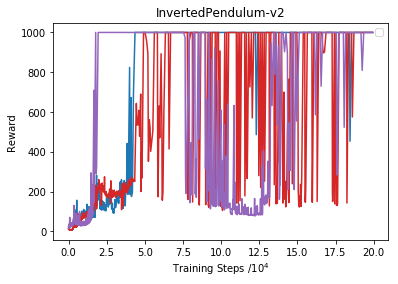

In [10]:
import os
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

def smooth(n,x,y):
    sm = np.zeros(10000)
    k=0
    f = lambda x,l,h: x <= h and x >= l
    sm_x = np.arange(1, np.max(x)-n+1, 100)
    for i in sm_x:
        idx = [f(var,i,i+n) for var in x]
        sm[k] = np.dot(idx,y)/np.sum(idx)
        k=k+1
    sm = sm[:k]
    sm_x = sm_x[:k] + np.floor(n/2)
    return sm, sm_x



env_ids = 'InvertedPendulum-v2'#, 'Hopper-v1', 'Walker2d-v1']#, 'HumanoidStandup-v1']
#ave_rewards = 4721.3959546#, 1982.82768185, 3062.83132533]

#################################################################################################
# expert data

expertfiles = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_001/gym_eval.monitor.csv')
expertfile2 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_002/gym_eval.monitor.csv')
expertfile3 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_003/gym_eval.monitor.csv')
expertfile4 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_004/gym_eval.monitor.csv')
expertfile5 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_005/gym_eval.monitor.csv')
expertfile6 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_006/gym_eval.monitor.csv')
expertfile7 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_007/gym_eval.monitor.csv')
expertfile8 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_008/gym_eval.monitor.csv')
expertfile9 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_009/gym_eval.monitor.csv')
expertfile10 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_010/gym_eval.monitor.csv')

expertfile11 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_011/gym_eval.monitor.csv')
expertfile12 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_012/gym_eval.monitor.csv')
expertfile13 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_013/gym_eval.monitor.csv')
expertfile14 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_014/gym_eval.monitor.csv')
expertfile15 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_015/gym_eval.monitor.csv')
expertfile16 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_016/gym_eval.monitor.csv')
expertfile17 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_017/gym_eval.monitor.csv')
expertfile18 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_018/gym_eval.monitor.csv')
expertfile19 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_019/gym_eval.monitor.csv')
expertfile20 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_020/gym_eval.monitor.csv')

expertfile21 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_021/gym_eval.monitor.csv')
expertfile22 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_022/gym_eval.monitor.csv')
expertfile23 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_023/gym_eval.monitor.csv')
expertfile24 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_024/gym_eval.monitor.csv')
expertfile25 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_025/gym_eval.monitor.csv')
expertfile26 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_026/gym_eval.monitor.csv')
expertfile27 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_027/gym_eval.monitor.csv')
expertfile28 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_028/gym_eval.monitor.csv')
expertfile29 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_029/gym_eval.monitor.csv')
expertfile30 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_new_1_25pre_030/gym_eval.monitor.csv')


expertdata = pandas.read_csv(expertfiles, index_col=None, comment='#')
expertdata2 = pandas.read_csv(expertfile2, index_col=None, comment='#')
expertdata3 = pandas.read_csv(expertfile3, index_col=None, comment='#')
expertdata4 = pandas.read_csv(expertfile4, index_col=None, comment='#')
expertdata5 = pandas.read_csv(expertfile5, index_col=None, comment='#')
expertdata6 = pandas.read_csv(expertfile6, index_col=None, comment='#')
expertdata7 = pandas.read_csv(expertfile7, index_col=None, comment='#')
expertdata8 = pandas.read_csv(expertfile8, index_col=None, comment='#')
expertdata9 = pandas.read_csv(expertfile9, index_col=None, comment='#')
expertdata10 = pandas.read_csv(expertfile10, index_col=None, comment='#')

expertdata11 = pandas.read_csv(expertfile11, index_col=None, comment='#')
expertdata12 = pandas.read_csv(expertfile12, index_col=None, comment='#')
expertdata13 = pandas.read_csv(expertfile13, index_col=None, comment='#')
expertdata14 = pandas.read_csv(expertfile14, index_col=None, comment='#')
expertdata15 = pandas.read_csv(expertfile15, index_col=None, comment='#')
expertdata16 = pandas.read_csv(expertfile16, index_col=None, comment='#')
expertdata17 = pandas.read_csv(expertfile17, index_col=None, comment='#')
expertdata18 = pandas.read_csv(expertfile18, index_col=None, comment='#')
expertdata19 = pandas.read_csv(expertfile19, index_col=None, comment='#')
expertdata20 = pandas.read_csv(expertfile20, index_col=None, comment='#')

expertdata21 = pandas.read_csv(expertfile21, index_col=None, comment='#')
expertdata22 = pandas.read_csv(expertfile22, index_col=None, comment='#')
expertdata23 = pandas.read_csv(expertfile23, index_col=None, comment='#')
expertdata24 = pandas.read_csv(expertfile24, index_col=None, comment='#')
expertdata25 = pandas.read_csv(expertfile25, index_col=None, comment='#')
expertdata26 = pandas.read_csv(expertfile26, index_col=None, comment='#')
expertdata27 = pandas.read_csv(expertfile27, index_col=None, comment='#')
expertdata28 = pandas.read_csv(expertfile28, index_col=None, comment='#')
expertdata29 = pandas.read_csv(expertfile29, index_col=None, comment='#')
expertdata30 = pandas.read_csv(expertfile30, index_col=None, comment='#')

x_expert = np.cumsum(expertdata['l'].values)
x_expert2 = np.cumsum(expertdata2['l'].values)
x_expert3 = np.cumsum(expertdata3['l'].values)
x_expert4 = np.cumsum(expertdata4['l'].values)
x_expert5 = np.cumsum(expertdata5['l'].values)
x_expert6 = np.cumsum(expertdata6['l'].values)
x_expert7 = np.cumsum(expertdata7['l'].values)
x_expert8 = np.cumsum(expertdata8['l'].values)
x_expert9 = np.cumsum(expertdata9['l'].values)
x_expert10 = np.cumsum(expertdata10['l'].values)

x_expert11 = np.cumsum(expertdata11['l'].values)
x_expert12 = np.cumsum(expertdata12['l'].values)
x_expert13 = np.cumsum(expertdata13['l'].values)
x_expert14 = np.cumsum(expertdata14['l'].values)
x_expert15 = np.cumsum(expertdata15['l'].values)
x_expert16 = np.cumsum(expertdata16['l'].values)
x_expert17 = np.cumsum(expertdata17['l'].values)
x_expert18 = np.cumsum(expertdata18['l'].values)
x_expert19 = np.cumsum(expertdata19['l'].values)
x_expert20 = np.cumsum(expertdata20['l'].values)

x_expert21 = np.cumsum(expertdata21['l'].values)
x_expert22 = np.cumsum(expertdata22['l'].values)
x_expert23 = np.cumsum(expertdata23['l'].values)
x_expert24 = np.cumsum(expertdata24['l'].values)
x_expert25 = np.cumsum(expertdata25['l'].values)
x_expert26 = np.cumsum(expertdata26['l'].values)
x_expert27 = np.cumsum(expertdata27['l'].values)
x_expert28 = np.cumsum(expertdata28['l'].values)
x_expert29 = np.cumsum(expertdata29['l'].values)
x_expert30 = np.cumsum(expertdata30['l'].values)
#x_expert_concat = np.concatenate((x_expert,x_expert2,x_expert3,x_expert4,x_expert5,x_expert6,x_expert7,x_expert8,x_expert9,x_expert10))

r_expert = expertdata['r']
r_expert2 = expertdata2['r']
r_expert3 = expertdata3['r']
r_expert4 = expertdata4['r']
r_expert5 = expertdata5['r']
r_expert6 = expertdata6['r']
r_expert7 = expertdata7['r']
r_expert8 = expertdata8['r']
r_expert9 = expertdata9['r']
r_expert10 = expertdata10['r']

r_expert11 = expertdata11['r']
r_expert12 = expertdata12['r']
r_expert13 = expertdata13['r']
r_expert14 = expertdata14['r']
r_expert15 = expertdata15['r']
r_expert16 = expertdata16['r']
r_expert17 = expertdata17['r']
r_expert18 = expertdata18['r']
r_expert19 = expertdata19['r']
r_expert20 = expertdata20['r']

r_expert21 = expertdata21['r']
r_expert22 = expertdata22['r']
r_expert23 = expertdata23['r']
r_expert24 = expertdata24['r']
r_expert25 = expertdata25['r']
r_expert26 = expertdata26['r']
r_expert27 = expertdata27['r']
r_expert28 = expertdata28['r']
r_expert29 = expertdata29['r']
r_expert30 = expertdata30['r']
#r_expert_concat = np.concatenate((r_expert,r_expert2,r_expert3,r_expert4,r_expert5,r_expert6,r_expert7,r_expert8,r_expert9,r_expert10))

##################################################################################################
#supervised data
supervisedfiles = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs',env_ids, 'ppoexpert_sup_new_1_25pre_001/gym_eval.monitor.csv')
supervisedfile2 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs',env_ids, 'ppoexpert_sup_new_1_25pre_002/gym_eval.monitor.csv')
supervisedfile3 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs',env_ids, 'ppoexpert_sup_new_1_25pre_003/gym_eval.monitor.csv')
supervisedfile4 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs',env_ids, 'ppoexpert_sup_new_1_25pre_004/gym_eval.monitor.csv')
supervisedfile5 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs',env_ids, 'ppoexpert_sup_new_1_25pre_005/gym_eval.monitor.csv')

superviseddata = pandas.read_csv(supervisedfiles, index_col=None, comment='#')
superviseddata2 = pandas.read_csv(supervisedfile2, index_col=None, comment='#')
superviseddata3 = pandas.read_csv(supervisedfile3, index_col=None, comment='#')
superviseddata4 = pandas.read_csv(supervisedfile4, index_col=None, comment='#')
superviseddata5 = pandas.read_csv(supervisedfile5, index_col=None, comment='#')

x_supervised = np.cumsum(superviseddata['l'].values)
x_supervised2 = np.cumsum(superviseddata2['l'].values)
x_supervised3 = np.cumsum(superviseddata3['l'].values)
x_supervised4 = np.cumsum(superviseddata4['l'].values)
x_supervised5 = np.cumsum(superviseddata5['l'].values)
x_supervised_concat = np.concatenate((x_supervised,x_supervised2,x_supervised3,x_supervised4,x_supervised5))

r_supervised = superviseddata['r']
r_supervised2 = superviseddata2['r']
r_supervised3 = superviseddata3['r']
r_supervised4 = superviseddata4['r']
r_supervised5 = superviseddata5['r']
r_supervised_concat = np.concatenate((r_supervised,r_supervised2,r_supervised3,r_supervised4,r_supervised5))


##################################################################################################
# baseline
baselinefiles = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'baseline_new_slr_001/gym_eval.monitor.csv')
baselinefile2 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'baseline_new_slr_002/gym_eval.monitor.csv')
baselinefile3 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'baseline_new_slr_003/gym_eval.monitor.csv')
baselinefile4 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'baseline_new_slr_004/gym_eval.monitor.csv')
baselinefile5 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'baseline_new_slr_005/gym_eval.monitor.csv')

baselinedata = pandas.read_csv(baselinefiles, index_col=None, comment='#')
baselinedata2 = pandas.read_csv(baselinefile2, index_col=None, comment='#')
baselinedata3 = pandas.read_csv(baselinefile3, index_col=None, comment='#')
baselinedata4 = pandas.read_csv(baselinefile4, index_col=None, comment='#')
baselinedata5 = pandas.read_csv(baselinefile5, index_col=None, comment='#')

x_baseline = np.cumsum(baselinedata['l'].values)
x_baseline2 = np.cumsum(baselinedata2['l'].values)
x_baseline3 = np.cumsum(baselinedata3['l'].values)
x_baseline4 = np.cumsum(baselinedata4['l'].values)
x_baseline5 = np.cumsum(baselinedata5['l'].values)
x_baseline_concat = np.concatenate((x_baseline,x_baseline2,x_baseline3,x_baseline4,x_baseline5))

r_baseline = baselinedata['r']
r_baseline2 = baselinedata2['r']
r_baseline3 = baselinedata3['r']
r_baseline4 = baselinedata4['r']
r_baseline5 = baselinedata5['r']
r_baseline_concat = np.concatenate((r_baseline,r_baseline2,r_baseline3,r_baseline4,r_baseline5))

####################################################################################################
#pdf = PdfPages('./test.pdf')
fig = plt.figure()#figsize=(6.4*3,4.0))

sm_n = 5000

'''
r_expert_smooth, x_expert_smooth = smooth(sm_n, x_expert_concat, r_expert_concat)
r_baseline_smooth, x_baseline_smooth = smooth(sm_n, x_baseline_concat, r_baseline_concat)
r_supervised_smooth, x_supervised_smooth = smooth(sm_n, x_supervised_concat, r_supervised_concat)
'''
ax = fig.add_subplot(111)
ax.plot(x_baseline4/1e4, r_baseline4, 'C0', alpha=1, label='')
ax.plot(x_expert15/1e4, r_expert15, 'C3', alpha=1, label='')
ax.plot(x_supervised/1e4, r_supervised, 'C4', alpha=1, label='')
'''
ax.plot(x_baseline_smooth/1e4, r_baseline_smooth, 'C0', label='DDPG')
ax.plot(x_expert_smooth/1e4, r_expert_smooth, 'C3', label='DDPG+pre-train')
ax.plot(x_supervised_smooth/1e4, r_supervised_smooth, 'C4', label='DDPG+supervise')
'''
ax.set_title(env_ids)
#ax.vlines(0.3, 0, 1, transform=ax.get_xaxis_transform(), colors='k', linestyles = "dashed", label='')
#ax.hlines(ave_rewards, 0, 1, transform=ax.get_yaxis_transform(), colors='C5', linestyles = "dashed", label='')
plt.xlabel('Training Steps /$10^4$')
plt.ylabel('Reward')
#plt.xlim(0, 10)
plt.legend()

plt.show()
#pdf.savefig(fig)
#plt.close()
#pdf.close()

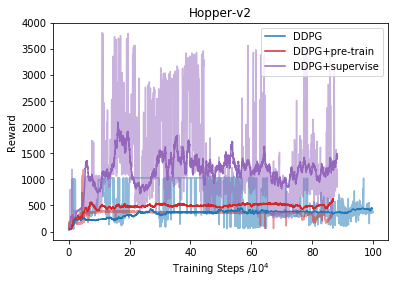

In [11]:
import os
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

def smooth(n,x,y):
    sm = np.zeros(10000)
    k=0
    f = lambda x,l,h: x <= h and x >= l
    sm_x = np.arange(1, np.max(x)-n+1, 100)
    for i in sm_x:
        idx = [f(var,i,i+n) for var in x]
        sm[k] = np.dot(idx,y)/np.sum(idx)
        k=k+1
    sm = sm[:k]
    sm_x = sm_x[:k] + np.floor(n/2)
    return sm, sm_x



env_ids = 'Hopper-v2'#, 'Hopper-v1', 'Walker2d-v1']#, 'HumanoidStandup-v1']
#ave_rewards = 4721.3959546#, 1982.82768185, 3062.83132533]

#################################################################################################
# expert data

expertfiles = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_1_100pre_001/gym_eval.monitor.csv')
expertfile2 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_1_100pre_002/gym_eval.monitor.csv')
expertfile3 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_1_100pre_003/gym_eval.monitor.csv')
expertfile4 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_1_100pre_004/gym_eval.monitor.csv')
expertfile5 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'ppoexpert_1_100pre_005/gym_eval.monitor.csv')


expertdata = pandas.read_csv(expertfiles, index_col=None, comment='#')
expertdata2 = pandas.read_csv(expertfile2, index_col=None, comment='#')
expertdata3 = pandas.read_csv(expertfile3, index_col=None, comment='#')
expertdata4 = pandas.read_csv(expertfile4, index_col=None, comment='#')
expertdata5 = pandas.read_csv(expertfile5, index_col=None, comment='#')

x_expert = np.cumsum(expertdata['l'].values)
x_expert2 = np.cumsum(expertdata2['l'].values)
x_expert3 = np.cumsum(expertdata3['l'].values)
x_expert4 = np.cumsum(expertdata4['l'].values)
x_expert5 = np.cumsum(expertdata5['l'].values)
x_expert_concat = np.concatenate((x_expert,x_expert2,x_expert3,x_expert4,x_expert5))#,x_expert6,x_expert7,x_expert8,x_expert9,x_expert10))

r_expert = expertdata['r']
r_expert2 = expertdata2['r']
r_expert3 = expertdata3['r']
r_expert4 = expertdata4['r']
r_expert5 = expertdata5['r']

r_expert_concat = np.concatenate((r_expert,r_expert2,r_expert3,r_expert4,r_expert5))#,r_expert6,r_expert7,r_expert8,r_expert9,r_expert10))

##################################################################################################
#supervised data
supervisedfiles = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs',env_ids, 'ppoexpert_sup_1_100pre_001/gym_eval.monitor.csv')
supervisedfile2 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs',env_ids, 'ppoexpert_sup_1_100pre_002/gym_eval.monitor.csv')
supervisedfile3 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs',env_ids, 'ppoexpert_sup_1_100pre_003/gym_eval.monitor.csv')
supervisedfile4 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs',env_ids, 'ppoexpert_sup_1_100pre_004/gym_eval.monitor.csv')
supervisedfile5 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs',env_ids, 'ppoexpert_sup_1_100pre_005/gym_eval.monitor.csv')

superviseddata = pandas.read_csv(supervisedfiles, index_col=None, comment='#')
superviseddata2 = pandas.read_csv(supervisedfile2, index_col=None, comment='#')
superviseddata3 = pandas.read_csv(supervisedfile3, index_col=None, comment='#')
superviseddata4 = pandas.read_csv(supervisedfile4, index_col=None, comment='#')
superviseddata5 = pandas.read_csv(supervisedfile5, index_col=None, comment='#')

x_supervised = np.cumsum(superviseddata['l'].values)
x_supervised2 = np.cumsum(superviseddata2['l'].values)
x_supervised3 = np.cumsum(superviseddata3['l'].values)
x_supervised4 = np.cumsum(superviseddata4['l'].values)
x_supervised5 = np.cumsum(superviseddata5['l'].values)
x_supervised_concat = np.concatenate((x_supervised,x_supervised2,x_supervised3,x_supervised4,x_supervised5))

r_supervised = superviseddata['r']
r_supervised2 = superviseddata2['r']
r_supervised3 = superviseddata3['r']
r_supervised4 = superviseddata4['r']
r_supervised5 = superviseddata5['r']
r_supervised_concat = np.concatenate((r_supervised,r_supervised2,r_supervised3,r_supervised4,r_supervised5))


##################################################################################################
# baseline
baselinefiles = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'baseline001/gym_eval.monitor.csv')
baselinefile2 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'baseline002/gym_eval.monitor.csv')
baselinefile3 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'baseline003/gym_eval.monitor.csv')
baselinefile4 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'baseline004/gym_eval.monitor.csv')
baselinefile5 = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, 'baseline005/gym_eval.monitor.csv')

baselinedata = pandas.read_csv(baselinefiles, index_col=None, comment='#')
baselinedata2 = pandas.read_csv(baselinefile2, index_col=None, comment='#')
baselinedata3 = pandas.read_csv(baselinefile3, index_col=None, comment='#')
baselinedata4 = pandas.read_csv(baselinefile4, index_col=None, comment='#')
baselinedata5 = pandas.read_csv(baselinefile5, index_col=None, comment='#')

x_baseline = np.cumsum(baselinedata['l'].values)
x_baseline2 = np.cumsum(baselinedata2['l'].values)
x_baseline3 = np.cumsum(baselinedata3['l'].values)
x_baseline4 = np.cumsum(baselinedata4['l'].values)
x_baseline5 = np.cumsum(baselinedata5['l'].values)
x_baseline_concat = np.concatenate((x_baseline,x_baseline2,x_baseline3,x_baseline4,x_baseline5))

r_baseline = baselinedata['r']
r_baseline2 = baselinedata2['r']
r_baseline3 = baselinedata3['r']
r_baseline4 = baselinedata4['r']
r_baseline5 = baselinedata5['r']
r_baseline_concat = np.concatenate((r_baseline,r_baseline2,r_baseline3,r_baseline4,r_baseline5))

####################################################################################################
#pdf = PdfPages('./test.pdf')
fig = plt.figure()#figsize=(6.4*3,4.0))

sm_n = 5000

r_baseline_smooth, x_baseline_smooth = smooth(sm_n, x_baseline_concat, r_baseline_concat)

r_expert_smooth, x_expert_smooth = smooth(sm_n, x_expert_concat, r_expert_concat)
r_supervised_smooth, x_supervised_smooth = smooth(sm_n, x_supervised_concat, r_supervised_concat)

ax = fig.add_subplot(111)
ax.plot(x_baseline/1e4, r_baseline, 'C0', alpha=0.5, label='')

ax.plot(x_expert/1e4, r_expert, 'C3', alpha=0.5, label='')
ax.plot(x_supervised/1e4, r_supervised, 'C4', alpha=0.5, label='')

ax.plot(x_baseline_smooth/1e4, r_baseline_smooth, 'C0', label='DDPG')

ax.plot(x_expert_smooth/1e4, r_expert_smooth, 'C3', label='DDPG+pre-train')
ax.plot(x_supervised_smooth/1e4, r_supervised_smooth, 'C4', label='DDPG+supervise')

ax.set_title(env_ids)
#ax.vlines(0.3, 0, 1, transform=ax.get_xaxis_transform(), colors='k', linestyles = "dashed", label='')
#ax.hlines(ave_rewards, 0, 1, transform=ax.get_yaxis_transform(), colors='C5', linestyles = "dashed", label='')
plt.xlabel('Training Steps /$10^4$')
plt.ylabel('Reward')
#plt.xlim(0, 10)
plt.legend()

plt.show()
#pdf.savefig(fig)
#plt.close()
#pdf.close()

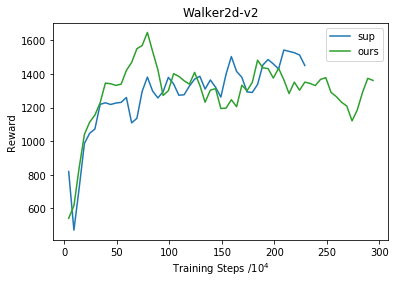

In [12]:
import os
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from IPython import display
import time

def smooth(n,x,y):
    sm = np.zeros(10000)
    k=0
    f = lambda x,l,h: x <= h and x >= l
    sm_x = np.arange(1, np.max(x)-n+1, 50000)
    for i in sm_x:
        idx = [f(var,i,i+n) for var in x]
        sm[k] = np.dot(idx,y)/np.sum(idx)
        k=k+1
    sm = sm[:k]
    sm_x = sm_x[:k] + np.floor(n/2)
    return sm, sm_x

env_ids = 'Walker2d-v2'

dir_names = ['ppoexpert_sup_1_25pre_4_long_low',
             #'ppoexpert_both_1_25pre_4_low_',
             'ppoexpert_1_25pre_4_long_low']
             #'baseline_4_long_']

labels = ['sup',
         #'both',
         'ours']
         #'baseline']

colors = ['C0',
         #'C1',
         'C2']
         #'C3']

sm_n = 80000
if True:
    i=0

    fig = plt.figure()
    ax = fig.add_subplot(111)
    for dir_name in dir_names:
        xs = []
        rs = []
        for j in range(5,14):
            name = dir_name + "%03d" % (j+1)
            file_path = os.path.join('~/Projects/conda/baselines/baselines/ddpg/logs', env_ids, name, 'gym_eval.monitor.csv')
            data = pandas.read_csv(file_path, index_col=None, comment='#')
            x = np.cumsum(data['l'].values); r = data['r']
            xs.append(x); rs.append(r)
        x_concat = np.concatenate(xs); r_concat = np.concatenate(rs)
        x_sm, r_sm = smooth(sm_n, x_concat, r_concat)
        ax.plot(r_sm/1e4, x_sm, colors[i], alpha=1, label=labels[i])
        i=i+1

    ax.set_title(env_ids)
    plt.xlabel('Training Steps /$10^4$')
    plt.ylabel('Reward')
    plt.legend()

    plt.show()
    time.sleep(100)
    display.clear_output(wait=True)

In [15]:
seeds = [234,4563,8274,9981,19982,
         77819,99818,88982,99991,199918,
         222918,381771,200928,999182,827466,
         881773]

baseline = False
ous = False
sup = False
gail = True
pofd = True


for i in range(16):
    stri = "%03d" % (i+1)
    if baseline:
        code = 'nohup python3 main.py --evaluation --env-id Walker2d-v2 --nb-epochs 1500 --log-dir baseline_4_long_' + stri + ' --seed ' + str(seeds[i]) + ' --actor-lr 0.0001 --critic-lr 0.001 &'
        print(code)
        
for i in range(16):
    stri = "%03d" % (i+1)
    if ous:
        code = 'nohup python3 main.py --use-expert --evaluation --env-id Walker2d-v2 --nb-epochs 1500 --expert-dir ~/Projects/conda/demonstrations/Walker_ppo2_low/expert.pkl --pre-epoch 25 --log-dir ppoexpert_1_25pre_4_long_low' + stri + ' --seed ' + str(seeds[i]) + ' --actor-lr 0.0001 --critic-lr 0.001 &'
        print(code)
for i in range(16):
    stri = "%03d" % (i+1)
    if sup:
        code = 'nohup python3 main.py --use-expert --evaluation --env-id Walker2d-v2 --nb-epochs 1500 --expert-dir ~/Projects/conda/demonstrations/Walker_ppo2_low/expert.pkl --pre-epoch 25 --supervise --log-dir ppoexpert_1_25pre_4_long_low' + stri + ' --seed ' + str(seeds[i]) + ' --actor-lr 0.0001 --critic-lr 0.001 &'
        print(code)
        
for i in range(16):
    stri = "%03d" % (i+1)
    if gail:
        code = 'nohup python3 main.py --use-expert --evaluation --env-id Hopper-v2 --nb-epochs 1500 --expert-dir ~/Projects/conda/demonstrations/Hopper_ppo2_low/expert.pkl --pre-epoch 25 --gail --log-dir ppoexpert_gail_1_25pre_4_long_low' + stri + ' --seed ' + str(seeds[i]) + ' --actor-lr 0.0001 --critic-lr 0.001 &'
        print(code)
        
        
for i in range(16):
    stri = "%03d" % (i+1)
    if pofd:
        code = 'nohup python3 main.py --use-expert --evaluation --env-id Hopper-v2 --nb-epochs 1500 --expert-dir ~/Projects/conda/demonstrations/Hopper_ppo2_low/expert.pkl --pre-epoch 25 --pofd --log-dir ppoexpert_pofd_1_25pre_4_long_low' + stri + ' --seed ' + str(seeds[i]) + ' --actor-lr 0.0001 --critic-lr 0.001 &'
        print(code)

nohup python3 main.py --use-expert --evaluation --env-id Hopper-v2 --nb-epochs 1500 --expert-dir ~/Projects/conda/demonstrations/Hopper_ppo2_low/expert.pkl --pre-epoch 25 --gail --log-dir ppoexpert_gail_1_25pre_4_long_low001 --seed 234 --actor-lr 0.0001 --critic-lr 0.001 &
nohup python3 main.py --use-expert --evaluation --env-id Hopper-v2 --nb-epochs 1500 --expert-dir ~/Projects/conda/demonstrations/Hopper_ppo2_low/expert.pkl --pre-epoch 25 --gail --log-dir ppoexpert_gail_1_25pre_4_long_low002 --seed 4563 --actor-lr 0.0001 --critic-lr 0.001 &
nohup python3 main.py --use-expert --evaluation --env-id Hopper-v2 --nb-epochs 1500 --expert-dir ~/Projects/conda/demonstrations/Hopper_ppo2_low/expert.pkl --pre-epoch 25 --gail --log-dir ppoexpert_gail_1_25pre_4_long_low003 --seed 8274 --actor-lr 0.0001 --critic-lr 0.001 &
nohup python3 main.py --use-expert --evaluation --env-id Hopper-v2 --nb-epochs 1500 --expert-dir ~/Projects/conda/demonstrations/Hopper_ppo2_low/expert.pkl --pre-epoch 25 --gai

In [3]:
for i in range(3,5):
    print(i)

3
4
